## **Importando as bibliotecas necessárias para o projeto:**

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
# Realiza a cópia de uma pasta específica do drive no ambiente colab:
!cp -R /content/gdrive/MyDrive/cursos/segmentacao_imagens_ia_expert_academy/imagens/imagens imagens/

## **Segmentação baseada em ``LIMIARIZAÇÃO``**

### **Limiarização global (threshold ou binarização) com limiar aleatório**

De forma simples a limiarização de uma imagem realiza a aplicação de um limiar ($k$), onde para os píxels no intervalo $0 < k$, teremos seus valores substituídos por 0 e para o intervalo de píxels $k > 255$, teremos seus valores substituídos por 255.

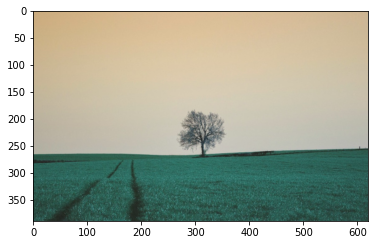

In [40]:
img = cv2.imread('/content/imagens/paisagem01.jpg')

# Plotagem da imagem. Existe uma diferença entre os canais Red e Green da imagem. 
# É necessário realizar a conversão de BGR para RGB
plt.imshow(img);

As dimensões da imagem em RGB são:  (389, 620, 3)


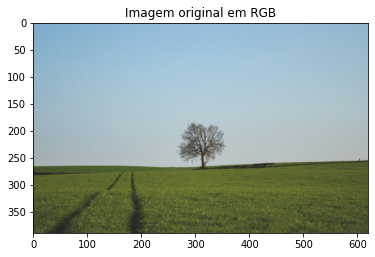

In [41]:
# Realizando a conversão de BGR para RGB com OpenCV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrando a imagem com os canais corrigidos:
plt.title('Imagem original em RGB')
plt.imshow(img_rgb);

print('As dimensões da imagem em RGB são: ', img_rgb.shape)

### **Processo de limiarização ou binarização**

Antes de iniciar o processo de limiarização, se faz necessário realizar a conversão dos canais RGB para níveis de cinza, ou seja, a imagem que antes era representada por três canais $(x, y, z)$, agora passará a ser representada apenas por dois $(x, y)$.

As dimensões da imagem passaram a ser:  (389, 620)


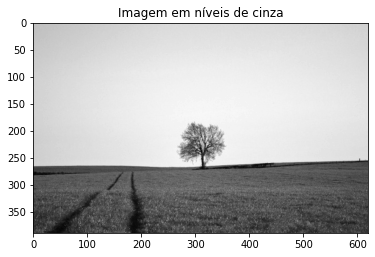

In [20]:
# Utiliza a função cvtCOLOR e o parâmetro COLOR_RGB2GRAY da biblioteca OpenCV para realizar
# a conversão da imagem para níveis de cinza.
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.title('Imagem em níveis de cinza')
plt.imshow(img_gray, cmap='gray');

print('As dimensões da imagem passaram a ser: ', img_gray.shape)

In [49]:
# variável de limiarização (podendo variar de 0 a 255):
k = 91 #@param {type: "slider", min:0, max: 255, set:1}
# realiza a binarização da imagem.
val, img_thresh = cv2.threshold(img_gray, k, 255, cv2.THRESH_BINARY)

print('O valor defeinido como limiar foi:', val)

O valor defeinido como limiar foi: 91.0


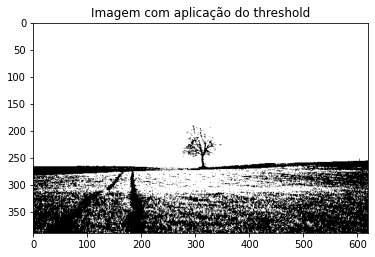

In [45]:
# resultado a imagem binarizada de acordo com a definição do limiar
plt.title('Imagem com aplicação do threshold')
plt.imshow(img_thresh, cmap='gray');


In [37]:
# criando uma função para mostrar as imagens 
def show_img(imagem, x, y, titulo):
  fig = plt.gcf()
  fig.set_size_inches(x, y)
  plt.title(titulo)
  plt.imshow(imagem, cmap='gray')

**Salvando o resultado obtido no diretório**

In [46]:
cv2.imwrite('img_thresh.jpg', img_thresh)

True

## **Tipos de limiarização (Binarização) com ``OpenCV``**

Nesta seção serão abordados outros tipos de limiarização comumente utilizadas na segmentação de imagens.

**Os resultados de cada método serão ilustrados ao fim dessa seção.**

### **THRESH_BINARY**

O método ``THRESH_BINARY`` já foi abordado anteriormente. O limiar $k$ será utilizado como padrão da binzarização.

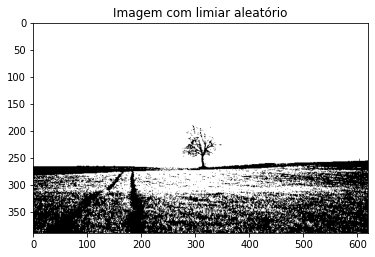

In [48]:
show_img(img_thresh, 6, 4, 'Imagem com limiar aleatório')

### **THRESH_BINARY_INV**

O ``THRESH_BINARY_INV`` como seu nome sugere, faz o oposto do ``THRESH_BINARY`` ou seja, para um limiar $k$, teremos a conversão dos seus píxels de tal forma que no intervalo $0 - k$, teremos $p = 255$ e $k - 255$, teremos $p = 0$.

Em outras palavras os valores acima de $k$ ficarão pretos e os valores abaixo de $k$ ficarão brancos.

In [ ]:
# implementação do THRESH_BINARY_INV

# k = limiar (variando de 0 - 255) 
k = 104 #@param {type: "slider", min:0, max: 255, set:1}
img_inv = cv2.threshold(img_gray, k, 255, cv2.THRESH_BINARY_INV)

### **THRESH_TOZERO**

### **THRESH_TOZERO_INV**

### **THRESH_TRUNC**

## **Método de Otsu para limiarização de imagens**